In [4]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
drugbank_input = Chem.SDMolSupplier('../data/drugbank.sdf')
drugbank = [m for m in drugbank_input if m]

In [6]:
drugbank_fps = [AllChem.GetMorganFingerprintAsBitVect(m,2, nBits=512) for m in drugbank]

In [12]:
first = drugbank_fps[0]
print(first.ToBitString())
len(first.ToBitString())

01001000100000000001000000001000010000010110000000000000000001001010000000000001101100101000001000000000000010011000010000000000100000000010100100010000100100000000000010000101010100010000000001001100010000000000001000110000100100000100000000100001010000000000000100100100001000000001000101000011000001000000101101000001000001000000000001001000010000000010100001110000010000011000011000000100000000100000000001000011100000010001000000000000010100100000000010100000010000110000000010001000100000000000000001110010


512

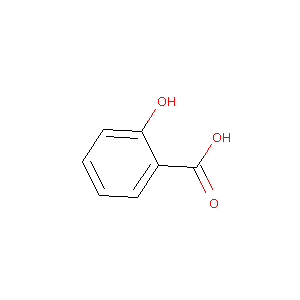

In [13]:
from rdkit import DataStructs
salicylica = Chem.MolFromSmiles("c1ccc(c(c1)C(=O)O)O")
Draw.MolToImage(salicylica)

In [15]:
salicylica_fp = AllChem.GetMorganFingerprintAsBitVect(salicylica, 2, nBits=512)
salicylica_fp.ToBitString()

'00000000000000000000000100000000000000000000000000000000000000001010000100000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000001000000000001000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000001000000000000000000100000000000000000000000010000000100000000000000000000000000000000010000000000000000000000000000000110000000000000000000000000000000000000010000000000000000'

In [18]:
salicylica_similarities = [DataStructs.FingerprintSimilarity(salicylica_fp, fp) for fp in drugbank_fps]
min(salicylica_similarities), max(salicylica_similarities), sum(salicylica_similarities)/len(salicylica_similarities)

(0.0, 1.0, 0.1337547673692333)

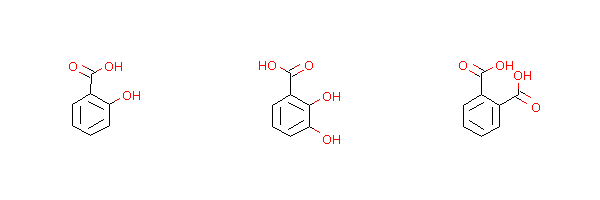

In [20]:
hit_indexes = [i for i, similarity in enumerate(salicylica_similarities) if similarity >= 0.6]
Draw.MolsToGridImage([drugbank[i] for i in hit_indexes])

In [21]:
#jaky bit jen nejnastavovanejsi a jake fragmenty reprezentuje?
bit_aggregation = [0]*512
for fp in drugbank_fps:
    for bit in fp.GetOnBits():
        bit_aggregation[bit] += 1

In [22]:
least_set_amount = min(bit_aggregation)
least_set_index = bit_aggregation.index(least_set_amount)
most_set_amount = max(bit_aggregation)
most_set_index = bit_aggregation.index(most_set_amount)
least_set_amount, least_set_index, most_set_amount, most_set_index

(96, 174, 5667, 356)

In [ ]:
def hit2Smiles(hit,mol):
    atomid, radius = hit
    if radius > 0:
        hit_atoms = Chem.FindAtomEnvironmentOfRadiusN(mol, radius, atomid)
        submol = Chem.Mo

In [25]:
def mol2fragments(mol):
    bitinfo = {}
    fp = AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=512,
                                          bitInfo=bitInfo)
    fragments = {bit: [hit2smiles(hit,mol) for hit in hits]
                 for bit, hits in bitinfo.items()}
    return fragments

In [26]:
def explain_bit(bit,molecules):
    fragments = {}
    for mol in drugbank:
        molecule_fragments = mol2fragments(mol)
        if bit in molecule_fragments:
            for smiles in molecule_fragments[bit]:
                fragments[smiles] = fragments.get(smiles,0) + 1

In [ ]:
explain_bit(356, drugbank)